# Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Uploading data (dataXid)

In [2]:
df = pd.read_csv("/mnt/workstation/data/DataXid_full_ok.csv")
df

,id_cli,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,...,ciudad_residencia_tag_ingreso_nompen,rep_calif_cred_tag_ingreso_nompen,genero_tag,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero
0,2089776.0,36,0,0,0,0,0.000000e+00,10,1.0,0.0,...,1178.0,6.0,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M
1,2088434.0,33,3,0,0,0,0.000000e+00,10,1.0,0.0,...,966.0,5.0,1,UNION LIBRE,UNIVERSITARIO,VETERINARIA,Independiente,SANDONA,D,F
2,2088089.0,34,1,0,0,0,0.000000e+00,8230,1.0,0.0,...,1192.0,6.0,2,UNION LIBRE,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,TENERIFE,C,M
3,4780572.0,27,1,0,0,0,1.328622e+07,10,1.0,0.0,...,616.0,5.0,2,SOLTERO,BACHILLER,OTROS,Empleado,PEDRAZA,D,M
4,3894402.0,29,1,0,0,0,0.000000e+00,1410,1.0,0.0,...,616.0,6.0,2,SOLTERO,TECNOLOGO,DISEÑO Y PUBLICIDAD,Independiente,PEDRAZA,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,2892117.0,36,0,0,0,0,3.375928e+06,4724,1.0,0.0,...,616.0,6.0,2,UNION LIBRE,BACHILLER,QUIMICA FARMACEUTICA,Comerciante,PEDRAZA,F,M
1047951,4772894.0,34,1,0,0,0,0.000000e+00,8299,1.0,0.0,...,616.0,6.0,1,SOLTERO,UNIVERSITARIO,MERCADOTECNIA,Independiente,PEDRAZA,C,F
1047952,4774849.0,25,0,0,0,0,0.000000e+00,10,1.0,0.0,...,616.0,5.0,1,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Empleado,PEDRAZA,D,F
1047953,3895049.0,30,0,0,0,0,1.922503e+06,10,1.0,0.0,...,1117.0,2.0,2,UNION LIBRE,BACHILLER,QUIMICA FARMACEUTICA,Empleado,ARMENIA,H,M


In [3]:
id_cli = df['id_cli']
df = df.drop(['id_cli'], axis=1)

In [4]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [5]:
features_f

Index(['cupo_total_tc', 'ctas_activas', 'ctas_embargadas', 'mediana_nom3',
       'mediana_nom3_desv', 'mediana_pen3_desv', 'ingreso_nompen_desv',
       'ingreso_final_desv', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio',
       'pol_centr_ext', 'saldo_prom3_tdc_mdo', 'cupo_tc_mdo',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar', 'estado_civil_tag_ind',
       'nivel_academico_tag_ind', 'profesion_tag_ind', 'ocupacion_tag_ind',
       'ciudad_residencia_tag_ind', 'rep_calif_cred_tag_ind',
       'estado_civil_tag_gasto_familiar', 'nivel_academico_tag_gasto_familiar',
       'profesion_tag_gasto_familiar', 'ocupacion_tag_gasto_familiar',
       'ciudad_residencia_tag_gasto_familiar',
       'rep_calif_cred_tag_gasto_familiar', 'estado_civil_tag_ingreso_nompen',
       'nivel_academico_tag_ingreso_nompen', 'profesion_tag_ingreso_nompen',
       'ocupacion_tag_ingr

In [6]:
df[features_o].describe(include='all').T

,count,unique,top,freq
estado_civil,1047955,5,SOLTERO,482249
nivel_academico,1047955,6,UNIVERSITARIO,574574
profesion,1047955,79,OTROS,296452
ocupacion,1047955,10,Empleado,664455
ciudad_residencia,1047955,899,PEDRAZA,266005
rep_calif_cred,1047955,8,A,221248
genero,1047955,2,M,530231


# One-Hot Encoding

In [7]:
df_onehot = pd.get_dummies(df, columns=features_o)
list(df_onehot.columns)

['edad',
 'mora_max',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'cupo_total_tc',
 'codigo_ciiu',
 'ctas_activas',
 'ctas_embargadas',
 'mediana_nom3',
 'ind_mora_vigente',
 'cartera_castigada',
 'tenencia_tc',
 'tiene_consumo',
 'tiene_crediagil',
 'tiene_ctas_activas',
 'tiene_ctas_embargadas',
 'pension_fopep',
 'tiene_cred_hipo_1',
 'tiene_cred_hipo_2',
 'cant_mora_30_tdc_ult_3m_sf',
 'cant_mora_30_consum_ult_3m_sf',
 'mediana_nom3_desv',
 'mediana_pen3_desv',
 'ingreso_nompen_desv',
 'ingreso_final_desv',
 'ingreso_nompen',
 'ingreso_final',
 'cuota_de_vivienda',
 'cuota_de_consumo',
 'cuota_rotativos',
 'cuota_de_sector_solidario',
 'cuota_sector_real_comercio',
 'pol_centr_ext',
 'saldo_prom3_tdc_mdo',
 'cupo_tc_mdo',
 'cant_oblig_tot_sf',
 'cant_cast_ult_12m_sr',
 'saldo_no_rot_mdo',
 'ind',
 'gasto_familiar',
 'estado_civil_tag_ind',
 'nivel_academico_tag_ind',
 'profesion_tag_ind',
 'ocupacion_tag_ind',
 'ciudad_residencia_ta

In [8]:
df_onehot

,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,mediana_nom3,...,rep_calif_cred_A,rep_calif_cred_B,rep_calif_cred_C,rep_calif_cred_D,rep_calif_cred_E,rep_calif_cred_F,rep_calif_cred_G,rep_calif_cred_H,genero_F,genero_M
0,36,0,0,0,0,0.000000e+00,10,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
1,33,3,0,0,0,0.000000e+00,10,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,34,1,0,0,0,0.000000e+00,8230,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,27,1,0,0,0,1.328622e+07,10,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,29,1,0,0,0,0.000000e+00,1410,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,36,0,0,0,0,3.375928e+06,4724,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1047951,34,1,0,0,0,0.000000e+00,8299,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1047952,25,0,0,0,0,0.000000e+00,10,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1047953,30,0,0,0,0,1.922503e+06,10,1.0,0.0,2302697.0,...,0,0,0,0,0,0,0,1,0,1


In [9]:
df_onehot.shape

(1047955, 1069)

# PCA - _Principal Component Analysis_

## Standardization

In [10]:
Estandar = StandardScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,1047955.0,-0.0,1.0,-1.67,-0.80,-0.22,0.65,5.66
1,1047955.0,-0.0,1.0,-0.26,-0.26,-0.26,-0.22,110.02
2,1047955.0,-0.0,1.0,-0.17,-0.17,-0.17,-0.17,14.50
3,1047955.0,-0.0,1.0,-0.11,-0.11,-0.11,-0.11,18.83
4,1047955.0,0.0,1.0,-0.09,-0.09,-0.09,-0.09,22.82
...,...,...,...,...,...,...,...,...
1064,1047955.0,-0.0,1.0,-0.29,-0.29,-0.29,-0.29,3.44
1065,1047955.0,-0.0,1.0,-0.36,-0.36,-0.36,-0.36,2.80
1066,1047955.0,0.0,1.0,-0.20,-0.20,-0.20,-0.20,4.93
1067,1047955.0,-0.0,1.0,-0.99,-0.99,-0.99,1.01,1.01


In [11]:
autovalores, autovectores = np.linalg.eig(df_std.T.dot(df_std))

In [13]:
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_onehot.columns
PCA['Autovalor'] = autovalores.real
PCA = PCA.sort_values(by=('Autovalor'), ascending=False, ignore_index = True)
PCA['Participacion'] = PCA['Autovalor']/PCA['Autovalor'].sum()*100
PCA['Acumulado'] = PCA['Participacion'].cumsum()
PCA.head(50)

,Variable,Autovalor,Participacion,Acumulado
0,edad,6.072900e+06,0.543112,0.543112
1,mora_max,5.412133e+06,0.484018,1.027130
2,cant_moras_30_ult_12_meses,4.598877e+06,0.411287,1.438416
3,cant_moras_60_ult_12_meses,3.963562e+06,0.354469,1.792886
4,cant_moras_90_ult_12_meses,3.849866e+06,0.344301,2.137187
5,cupo_total_tc,3.752470e+06,0.335591,2.472778
6,codigo_ciiu,3.490105e+06,0.312127,2.784905
7,ctas_activas,2.970751e+06,0.265680,3.050585
8,ctas_embargadas,2.701030e+06,0.241559,3.292144
9,mediana_nom3,2.519018e+06,0.225281,3.517424


Text(0.5, 1.0, 'Componentes Principales')

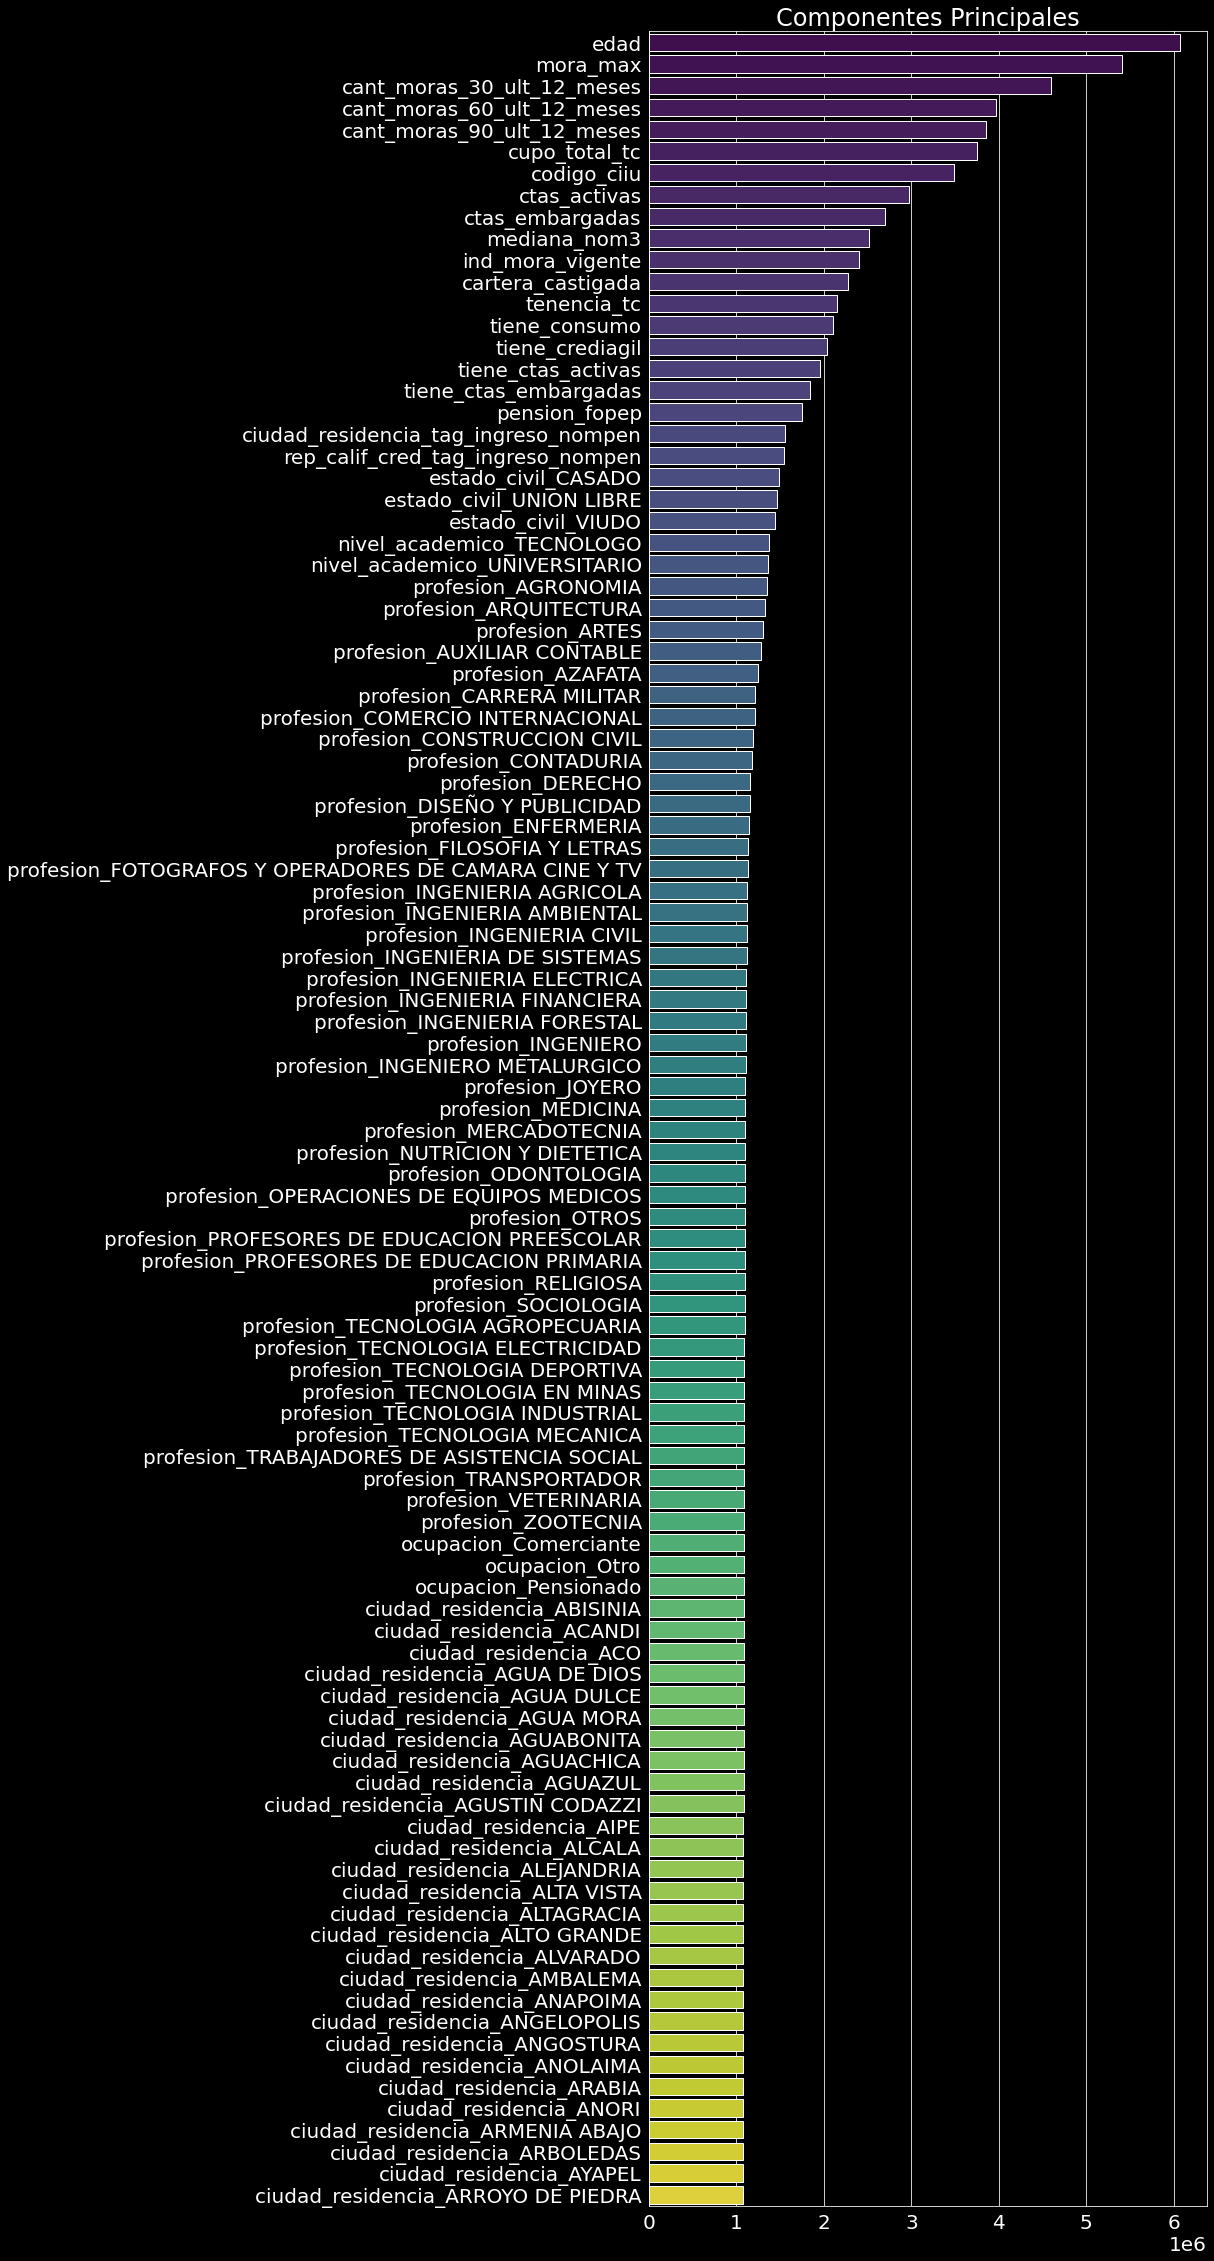

In [14]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(10,40))
y = np.array(list(PCA['Variable'].head(100)))
x = np.array(list(PCA['Autovalor'].head(100)))
sns.barplot(x=x, y=y, palette="viridis")
plt.title("Componentes Principales")

Text(0.5, 1.0, 'Componentes Principales DataXid')

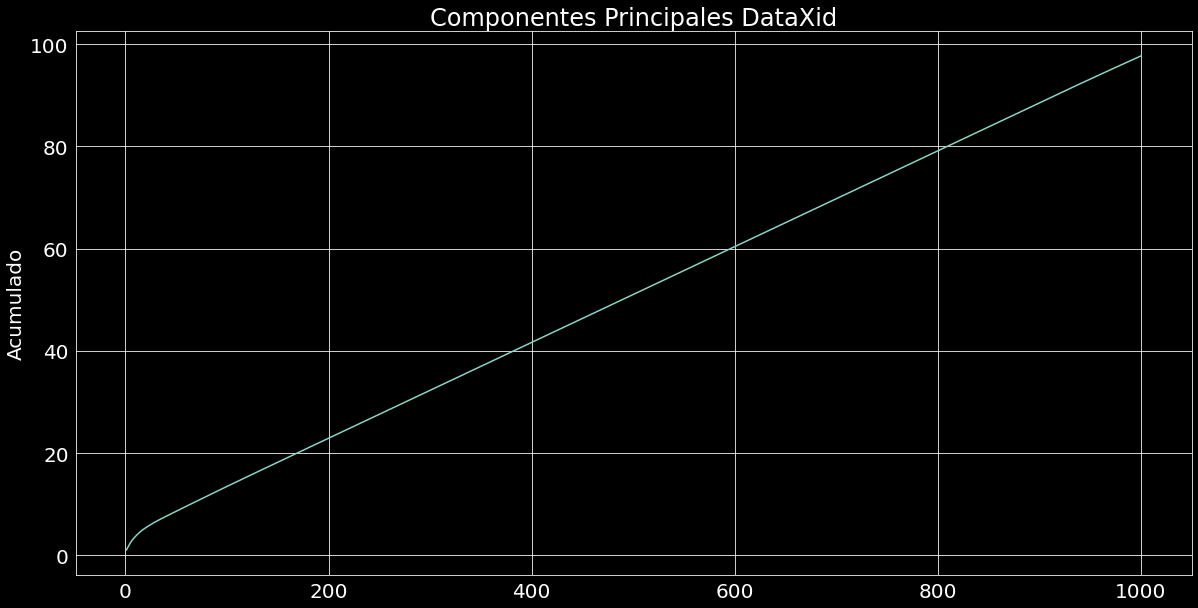

In [23]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
y = PCA.loc[1:1000,'Acumulado']
x = range(1,1001)
sns.lineplot(x=x, y=y, palette="69d")
plt.title("Componentes Principales DataXid")

In [24]:
PCA.to_csv("/mnt/workstation/data/PCA_Xid.csv", index=False)